In [1]:
import random
from tqdm import tqdm

import torch
import torch.optim as optim
from torchvision import transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from src.tools import *
from src.MyRadarNetTools import *
from src.MyRadarNet import *
# SEED = 42

# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device is ready: ", device)

Device is ready:  cuda:0


## Импорт файлов

In [2]:
x, y, _ = read_Files()

<generator object walk at 0x0000020E128BF5F0>


100%|██████████| 84/84 [01:20<00:00,  1.04it/s]

17485 files loaded.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_dataloader, val_dataloader = make_dataloader(X_train, X_test, y_train, y_test, batch=64)

torch.Size([4624, 3, 11, 61]) torch.Size([4624]) torch.Size([1157, 3, 11, 61]) torch.Size([1157])


In [4]:
frame_count = 3
model = MyRadarNet(frame_count)
model.cuda()

n_epochs = 50
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005, eps=1e-08)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.97)

In [9]:
# all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
# accuracy = accuracy_score(predicted_labels, true_labels)
# print("tests passed")
# print(accuracy)

tests passed
0.28694900605012963


Эпоха: 50;	train loss: 0.590;	valid loss: 0.601;	Точность: 95.76 % 


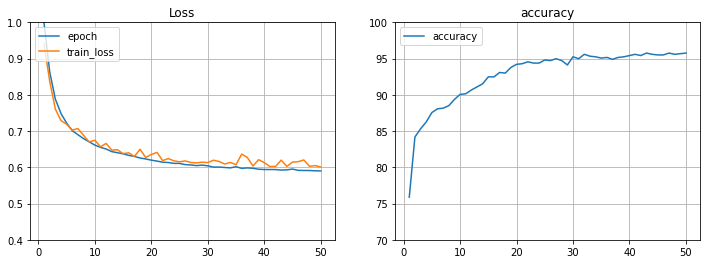

In [5]:
%matplotlib inline

torch.cuda.empty_cache()
train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device, n_epochs)

In [9]:
# from torchmetrics import  ConfusionMatrix
# all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
# confmat = ConfusionMatrix(task="binary", num_classes=3)
# confmat(predicted_labels, true_labels)